In [1]:
import numpy as np
import pocomc as pc
import os
from getdist import plots, MCSamples
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names = ["b", "f"]
labels = ["b", "f"]

ref_chain = np.load("../output/BOSS_DR12_NGC_z1/samples/n2048/cov_sample/cov_sample_2048_results_v1.npy", allow_pickle=True)
reference = MCSamples(samples=ref_chain[()]["samples"], labels=labels, names=names)

Removed no burn in


In [461]:
estimates = [
    ['cov', 'sample', "Sample"],
    ['cov', 'shrinkage_emp', "Covariance shrinkage\ntarget $\mathbf{T}^{(1)}$ (empirical)"],
    ['cov', 'shrinkage_ana', "Covariance shrinkage\ntarget $\mathbf{T}^{(2)}$ (analytical)"],
    ['cov', 'NERCOME', "NERCOME"],
    ['pre', 'shrinkage_emp', "Precision shrinkage\ntarget $\mathbf{\Pi}_0^{(1)}$ (empirical)"],
    ['pre', 'shrinkage_ana', "Precision shrinkage\ntarget $\mathbf{\Pi}_0^{(2)}$ (analytical)"],
]

n = 24
iestimate = 5

mat_type = estimates[iestimate][0]
est_type = estimates[iestimate][1]
label = estimates[iestimate][2]

if n==24:
    param_limits = {"b": (1.83, 2.05), "f": (0.3, 0.9)}
elif n==30:
    param_limits = {"b": (1.85, 2.05), "f": (0.4, 0.85)}
elif n==2048:
    param_limits = {"b": (1.88, 2.02), "f": (0.45, 0.75)} # n=2048 tick limits

In [462]:
datapath = f"../output/BOSS_DR12_NGC_z1/samples/n{n}/{mat_type}_{est_type}/"
contours = [reference]
colors = ["red"]

for k in [8, 11, 54]:
    fname = f"{mat_type}_{est_type}_{n}_results_v{k}.npy"
    results = np.load(os.path.join(datapath, fname), allow_pickle=True)[()]
    chain = MCSamples(samples=results["samples"], labels=labels, names=names)
    
    contours.append(chain)
    colors.append("blue")

Removed no burn in
Removed no burn in
Removed no burn in


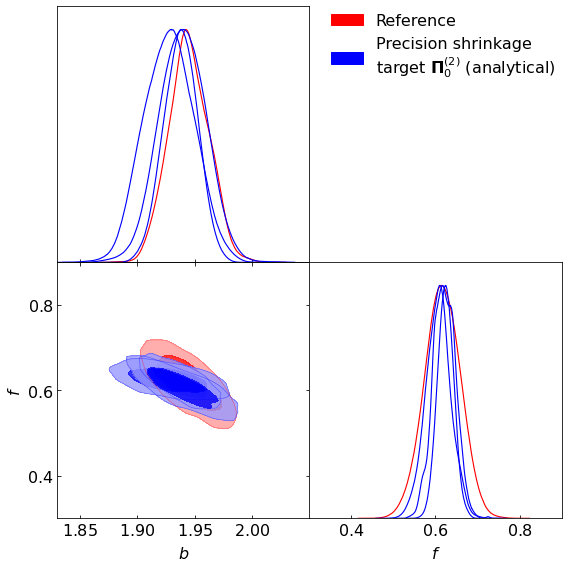

In [463]:
g = plots.getSubplotPlotter(subplot_size=4)
g.settings.figure_legend_frame = False
g.settings.legend_fontsize=16
g.settings.axes_fontsize=16
g.settings.axes_labelsize=16
g.triangle_plot(
    contours,
    contour_colors=colors,
    filled=True,
    contour_args={'alpha':0.8},
    legend_labels=["Reference", label],
    param_limits = param_limits,
)

plt.savefig(f"../output/BOSS_DR12_NGC_z1/plots/contours/{mat_type}_{est_type}_n{n}.pdf", format="pdf", bbox_inches='tight', pad_inches = 0.1)